Import numpy, pandas, matplotlib, and seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")


Read the Dataset

In [2]:
data_2015 = pd.read_csv("C:/Users/dlaminus/Desktop/Data Analysis/Seattle Buildings and Energy/2015-building-energy-benchmarking.csv")
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

Data Cleaning

In [4]:
#separate the items in the nest 'Location' columns
import ast
data_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_2015.Location.iteritems()]
data_2015 = pd.concat([data_2015.drop(['Location'], axis=1), data_2015['Location'].apply(pd.Series)], axis=1)
data_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_2015.human_address.iteritems()]
data_2015 = pd.concat([data_2015.drop(['human_address'], axis=1), data_2015['human_address'].apply(pd.Series)], axis=1)
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [5]:
data_2015 = data_2015.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

In [6]:
data_2015 = data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})

In [7]:
data_2015['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)'], dtype=object)

In [8]:
print("The dataset now has {} lines and {} columns.".format(data_2015.shape[0],data_2015.shape[1]))

The dataset now has 3340 lines and 52 columns.


In [9]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                

In [10]:
def search_component(df, suffix=None):
  component = []
  for col in df.columns:
      if suffix in col: 
        component.append(col)
  return component

In [11]:
data_2015.drop(search_component(data_2015,'WN'), axis=1, inplace=True)

In [12]:
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
data_2015.drop(redundant_features, axis=1, inplace=True)

In [13]:
data_2015 = data_2015[~((data_2015['SiteEnergyUse(kBtu)'].isnull()) | (data_2015['TotalGHGEmissions'].isnull()))]

In [14]:
data_2015.drop("Comments", axis=1, inplace=True)

In [15]:
data_2015 = data_2015[~data_2015['Outlier'].isnull()==False]
data_2015.drop('Outlier', axis=1, inplace=True)

In [16]:
data_2015['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant'], dtype=object)

In [17]:
import re
regex = re.compile(r'[\n\r\t]')
data_2015['PrimaryPropertyType'] = [regex.sub("", item) for index, item in data_2015.PrimaryPropertyType.iteritems()]
data_2015.loc[(data_2015['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    279
Other                          195
Non-Refrigerated Warehouse     181
Large Office                   157
Mixed Use Property              99
Retail Store                    96
Worship Facility                72
Hotel                           71
Distribution Center             51
Medical Office                  42
K-12 School                     39
Supermarket/Grocery Store       36
Self-Storage Facility           28
Senior Care Community           19
College/University              16
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Hospital                        10
Restaurant                      10
Laboratory                       1
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [18]:
#In ListofAllPropertyUseTypes, split the types and count the number of types
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(data_2015, 'ListOfAllPropertyUseTypes')
print("Number of types of uses in the database : {}".format(len(list_use_type)))

Number of types of uses in the database : 114


In [19]:
data_2015['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in data_2015['ListOfAllPropertyUseTypes'].str.split(',')]
data_2015.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [20]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode,TotalUseTypeNumber
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101,1
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101,3
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101,3
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121,3
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1,...,NaN,7.0,19576,47.6164389,-122.33676431,810 VIRGINIA ST,SEATTLE,WA,98101,1


In [21]:
#dataframe includes only column of 'TotalUseTypeNumber' and columns with GFA
gfa_features = search_component(data_2015, suffix='GFA')
data_2015[['TotalUseTypeNumber'] + gfa_features].head()

,TotalUseTypeNumber,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,1,88434,0,88434,88434.0,NaN,NaN
1,3,103566,15064,88502,83880.0,15064.0,4622.0
2,3,961990,0,961990,757243.0,100000.0,0.0
4,3,119890,12460,107430,123445.0,68009.0,0.0
5,1,97288,37198,60090,88830.0,NaN,NaN


In [22]:
#Ratio: i.e. GFABuildingRate = PropertyGFABuilding(s)/PropertyGFATotal, 5 decimals
#Refine the terms about Property Use Type GFA to the ratio as the above-mentioned, then drop the original terms

data_2015['GFABuildingRate'] = (round((data_2015['PropertyGFABuilding(s)'].fillna(0)
                                  /data_2015['PropertyGFATotal'].fillna(0)),5))
data_2015['GFAParkingRate'] = (round((data_2015['PropertyGFAParking'].fillna(0)
                                 /data_2015['PropertyGFATotal'].fillna(0)),5))

#Drop variables
data_2015.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#Fill in 
data_2015['LargestPropertyUseType'] = data_2015['LargestPropertyUseType'].fillna("Unknown")
data_2015['NumberofFloors'] = data_2015['NumberofFloors'].fillna(1)

In [23]:
#calculate the average area per building and per floor:
data_2015['GFAPerBuilding'] = round((data_2015['PropertyGFATotal'] / data_2015['NumberofBuildings']),3)
data_2015['GFAPerFloor'] = round((data_2015['PropertyGFATotal'] / data_2015['NumberofFloors']),3)

In [24]:
#Drop the columns 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity' 
EUI_features = search_component(data_2015, suffix='EUI(kBtu/sf)') + ['GHGEmissionsIntensity']
data_2015.drop(EUI_features, axis=1, inplace=True)

In [25]:
data_2015['ComplianceStatus'].unique()

array(['Compliant'], dtype=object)

In [26]:
print("Number of rows identified as non-compliant : {}.".format(data_2015[data_2015['ComplianceStatus'] != "Compliant"].shape[0]))

Number of rows identified as non-compliant : 0.


In [27]:
#keep the dataframe's content in compliance status = compliant and elimate unnecessary columns
data_2015 = data_2015[data_2015['ComplianceStatus'] == "Compliant"]

In [28]:
data_2015 = data_2015.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

In [29]:
data_2015 = data_2015.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                            'Seattle Police Department Micro Community Policing Plan Areas',
                            'City Council Districts','SPD Beats',
                           ], axis=1)

In [30]:
data_2015[(data_2015.GFAPerBuilding == np.inf) | (data_2015.GFAPerFloor == np.inf)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,Latitude,Longitude,Address,State,ZipCode,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
166,267,2015,NonResidential,Hotel,PINE ST. CONDO-ELLIOTT GRAND HYATT SEATTLE,DOWNTOWN,1999,1,0.0,934292,...,47.61267744,-122.33393177,721 PINE ST,WA,98101,5,1.00000,0.00000,934292.0,inf
489,656,2015,NonResidential,Medical Office,1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON),EAST,2004,1,0.0,225982,...,47.60967963,-122.3231052,1221 MADISON ST,WA,98104,1,1.00000,0.00000,225982.0,inf
490,657,2015,NonResidential,Mixed Use Property,2200 WESTLAKE,DOWNTOWN,2006,1,0.0,516407,...,47.617939,-122.33738708,2200 WESTLAKE AVE,WA,98121,7,1.00000,0.00000,516407.0,inf
565,758,2015,NonResidential,Other,PACIFIC PLACE,DOWNTOWN,1999,1,0.0,947987,...,47.61287405,-122.335276,600 PINE ST,WA,98101,4,0.53566,0.46434,947987.0,inf
1775,23311,2015,NonResidential,Other,FIRST HILL MEDICAL PAVILLION,EAST,1945,1,0.0,274568,...,47.60830458,-122.3233504,1124 COLUMBIA ST,WA,98104,1,1.00000,0.00000,274568.0,inf


In [31]:
data_2015[['GFAPerBuilding','GFAPerFloor']]

,GFAPerBuilding,GFAPerFloor
0,88434.0,7369.500
1,103566.0,9415.091
2,961990.0,23463.171
4,119890.0,6660.556
5,97288.0,48644.000
...,...,...
3335,44650.0,11162.500
3336,42393.0,6056.143
3337,319481.0,7987.025
3338,48230.0,16076.667


In [32]:
data_2015['GFAPerBuilding'] = np.where(((data_2015.GFAPerBuilding == np.inf) & (data_2015.NumberofBuildings == 0)),0, data_2015.GFAPerBuilding)
data_2015['GFAPerFloor'] = np.where(((data_2015.GFAPerFloor == np.inf) & (data_2015.NumberofFloors == 0)),0, data_2015.GFAPerFloor)

In [33]:
identification_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode']
drop_features = ['OSEBuildingID', 'Address', 'ZipCode']
data_identification = data_2015[identification_features]
data_2015.drop(drop_features, axis=1, inplace = True)

In [34]:
data_filter=data_2015

In [35]:
#save the dataset
data_2015.to_csv("C:/Users/dlaminus/Desktop/Data Analysis/Kaggle_Building Energy/Seattle Buildings and Energy Analysis (Final_25Oct2022).csv", index=False)

Data Mining and Visualization

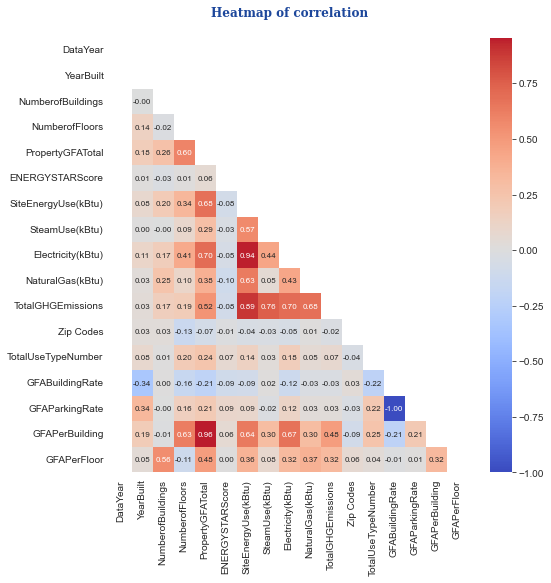

In [36]:
# Correlation among the data columns
#a) Using Pearson Correlation

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 12,
             }

corr = data_2015.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap of correlation\n", 
          fontdict=font_title)
plt.show()

In [37]:
#b) Under the threshold of 0.7 to confine the correlation result

threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
10,GFAPerBuilding,PropertyGFATotal,0.955969
8,SiteEnergyUse(kBtu),Electricity(kBtu),0.941414
6,TotalGHGEmissions,SiteEnergyUse(kBtu),0.892636
4,TotalGHGEmissions,SteamUse(kBtu),0.756680
2,Electricity(kBtu),PropertyGFATotal,0.700599
0,GFABuildingRate,GFAParkingRate,-1.000000


In [38]:
#c) Verification of multicollinearity with the VIF (Variance Inflation Factor)
#VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem.  

from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = data_2015[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data_2015 = pd.DataFrame()
vif_data_2015["feature"] = X.columns
vif_data_2015["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data_2015[vif_data_2015['VIF'] > 5]

,feature,VIF
0,Electricity(kBtu),1735.226474
1,SteamUse(kBtu),63.997524
2,TotalGHGEmissions,1504.810947
4,PropertyGFATotal,13.490747
6,GFAPerBuilding,12.370494
7,SiteEnergyUse(kBtu),4808.389155


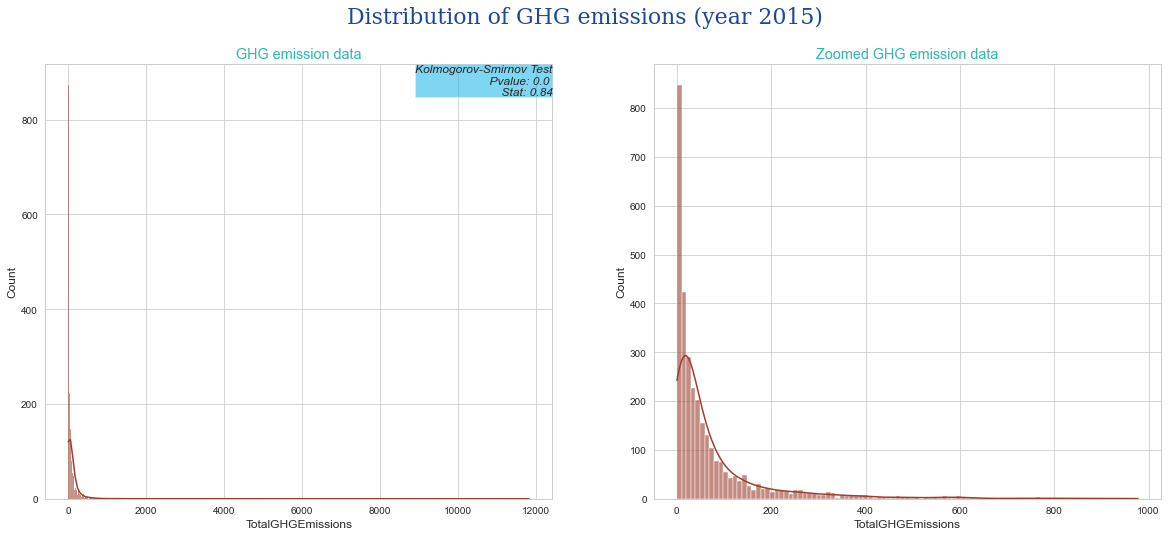

In [39]:
#2. GHG Emission and Energy Use Distribution by Kolmogorov-Smirnov Test

import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data_2015, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("GHG emission data", color='#2cb7b0')

#Test of Kolmogorov-Smirnov
kstest = stats.kstest(data_2015['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Kolmogorov-Smirnov Test\n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, size = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data_2015[(data_2015['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Zoomed GHG emission data", color='#2cb7b0')

plt.suptitle("Distribution of GHG emissions (year 2015)", 
             fontdict=font_title, size=22)
plt.show()

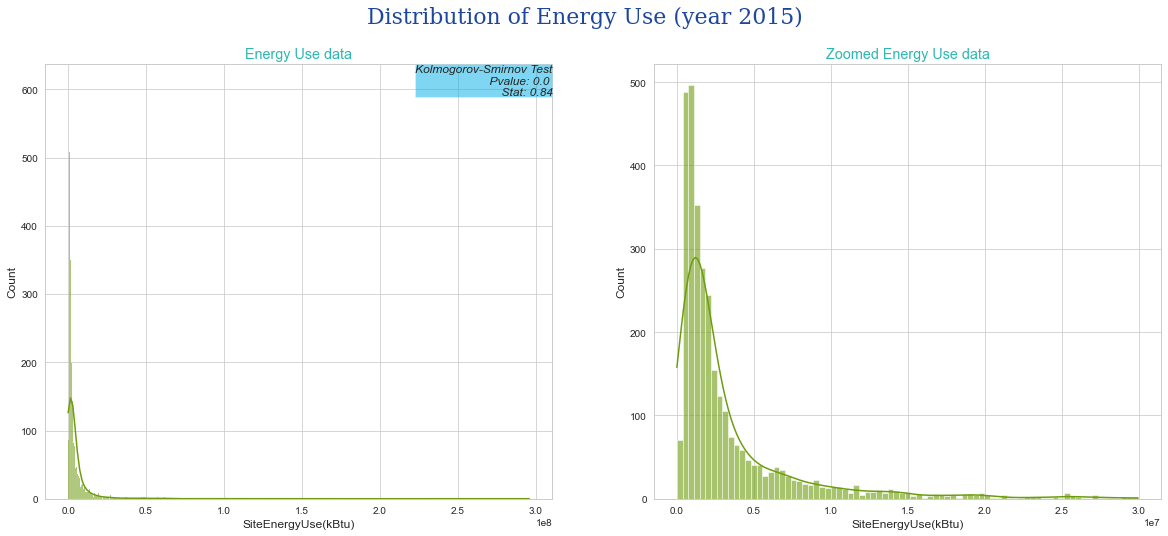

In [40]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data_2015, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Energy Use data", color='#2cb7b0')

#Test of Kolmogorov-Smirnov
kstest = stats.kstest(data_2015['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Kolmogorov-Smirnov Test\n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, size = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data_2015[(data_2015['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Zoomed Energy Use data", color='#2cb7b0')

plt.suptitle("Distribution of Energy Use (year 2015)", 
             fontdict=font_title, size=22)
plt.show()

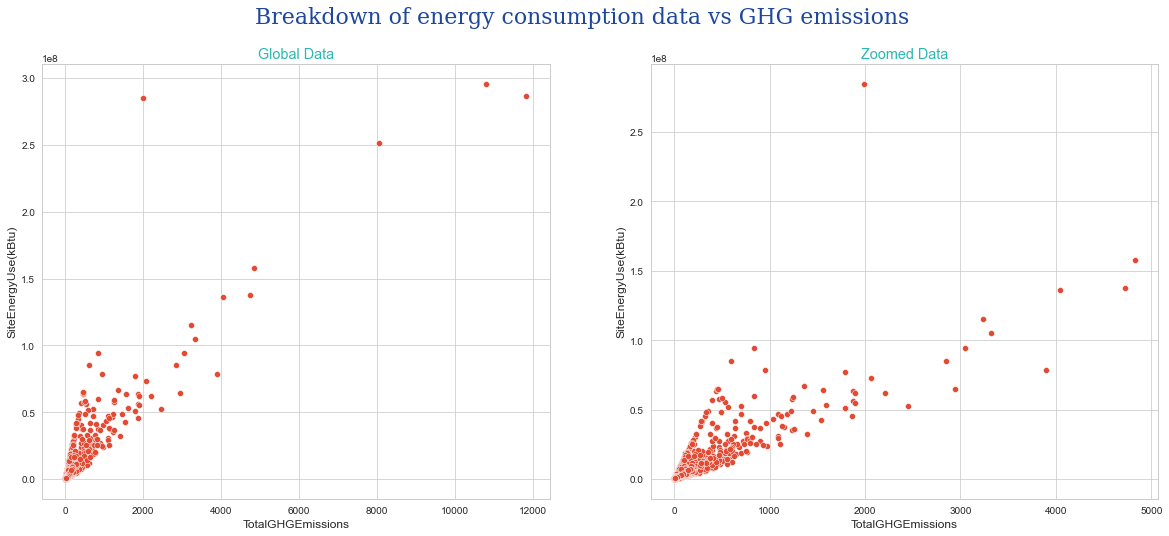

In [41]:
#3.	Relationship between Energy Use and GHG Emission 

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data_2015, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Global Data", color='#2cb7b0')
sns.scatterplot(data=data_2015[(data_2015['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Zoomed Data", color='#2cb7b0')
plt.suptitle("Breakdown of energy consumption data vs GHG emissions", fontdict=font_title, size=22)
plt.show()

In [42]:
from math import radians, cos, sin, asin, sqrt

#Seattle Coordinate points
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # radius of the earth in miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formulate Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [43]:
#Haversine Distance - calculation of distances to the center of Seattle for each point
data_2015['haversine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data_2015.Latitude.astype(float), data_2015.Longitude.astype(float))]

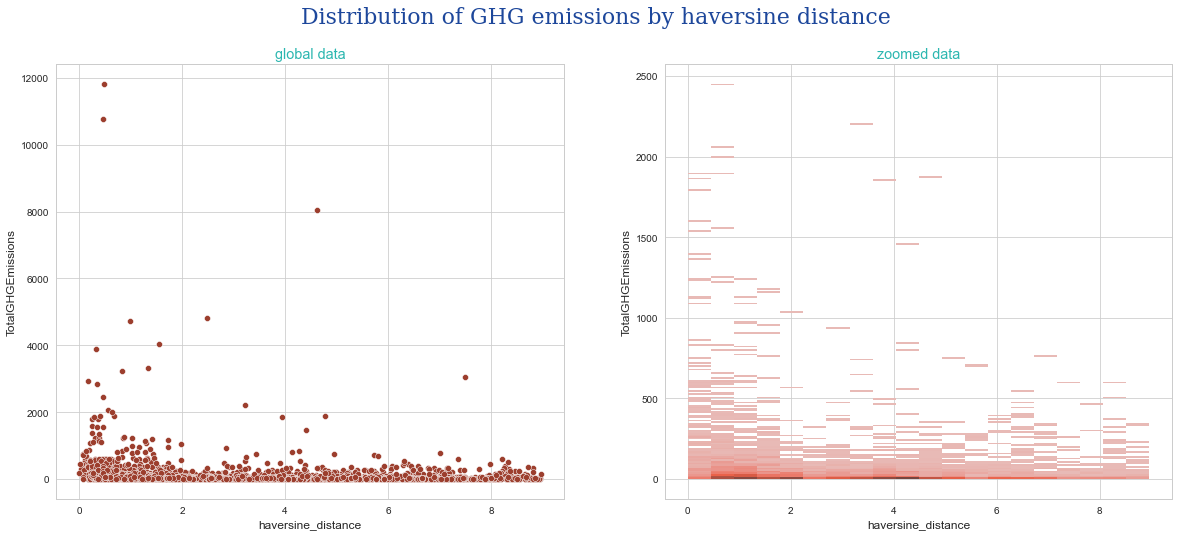

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data_2015, y="TotalGHGEmissions", x="haversine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("global data", color='#2cb7b0')
sns.histplot(data=data_2015[(data_2015['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="haversine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("zoomed data", color='#2cb7b0')
plt.suptitle("Distribution of GHG emissions by haversine distance", 
             fontdict=font_title, size=22)
plt.show()

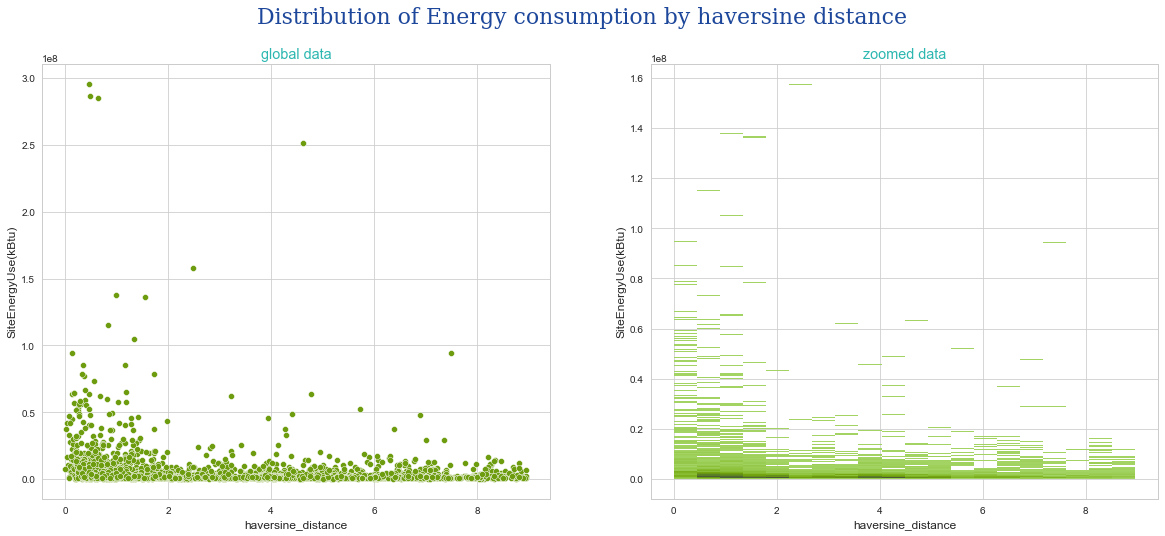

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data_2015, y="SiteEnergyUse(kBtu)", x="haversine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("global data", color='#2cb7b0')
sns.histplot(data=data_2015[(data_2015['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="haversine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("zoomed data", color='#2cb7b0')
plt.suptitle("Distribution of Energy consumption by haversine distance", 
             fontdict=font_title, size=22)
plt.show()

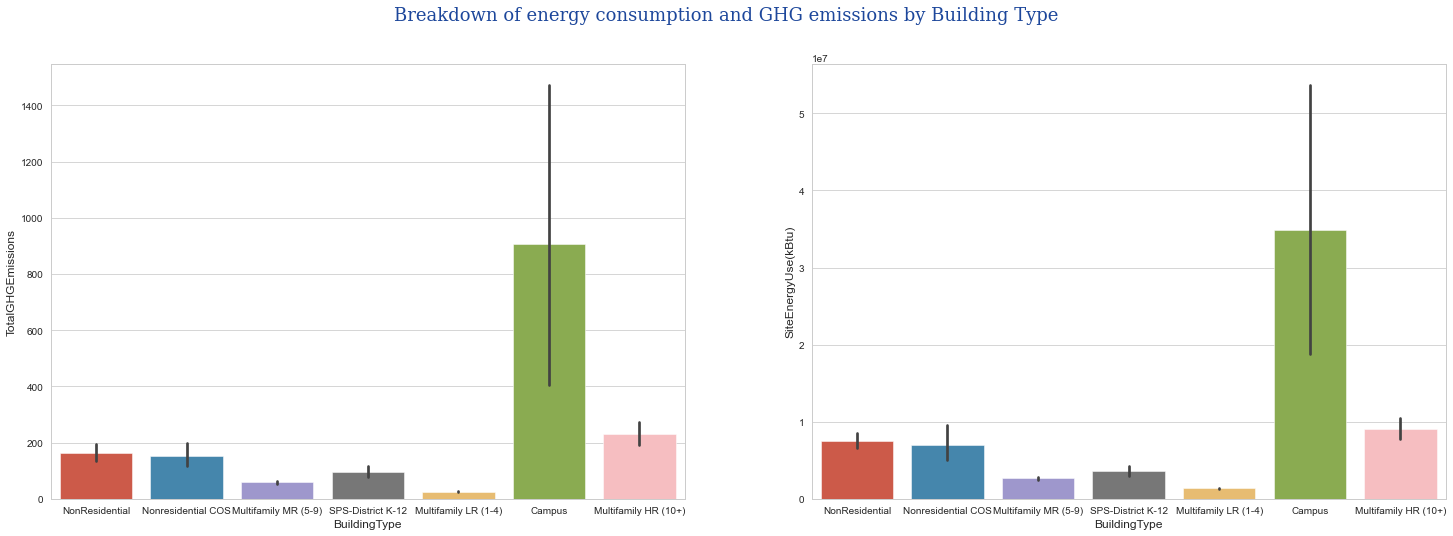

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(25,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data_2015, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data_2015, ax=axes[1])
plt.suptitle("Breakdown of energy consumption and GHG emissions by Building Type", 
             fontdict=font_title, size=18)
plt.show()

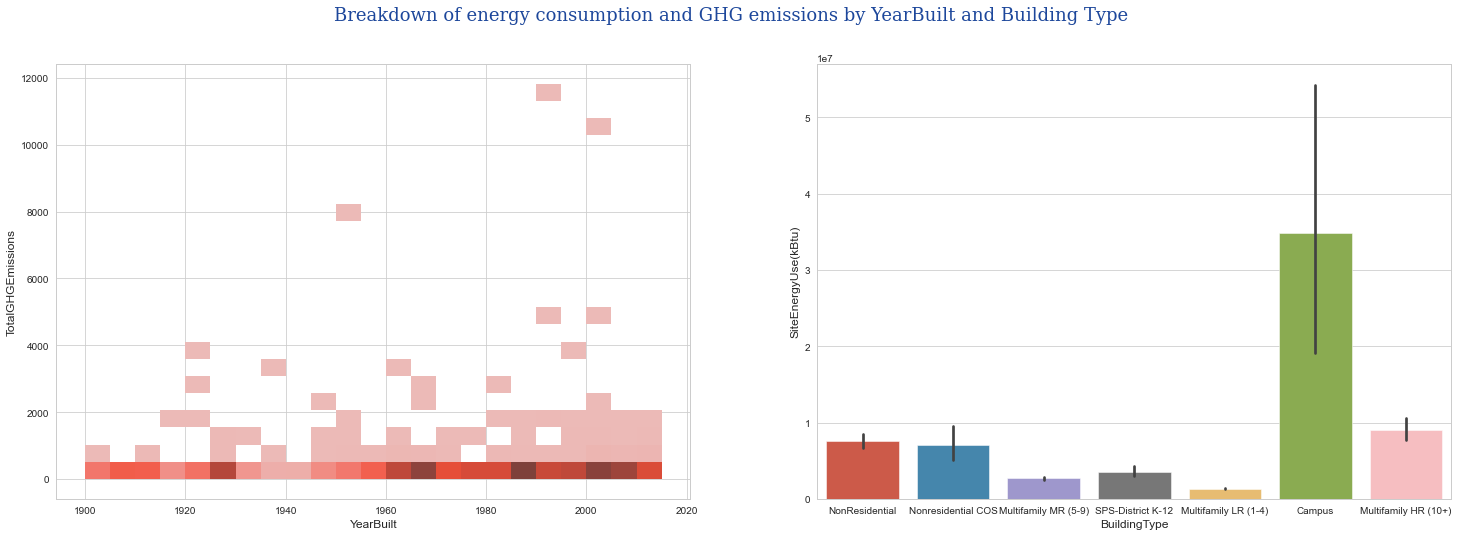

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(25,8))
sns.histplot(x='YearBuilt',y='TotalGHGEmissions',data=data_2015, ax=axes[0], bins=int((data_2015.YearBuilt.max() - data_2015.YearBuilt.min())/5))
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data_2015, ax=axes[1])
plt.suptitle("Breakdown of energy consumption and GHG emissions by YearBuilt and Building Type", 
             fontdict=font_title, size=18)
plt.show()

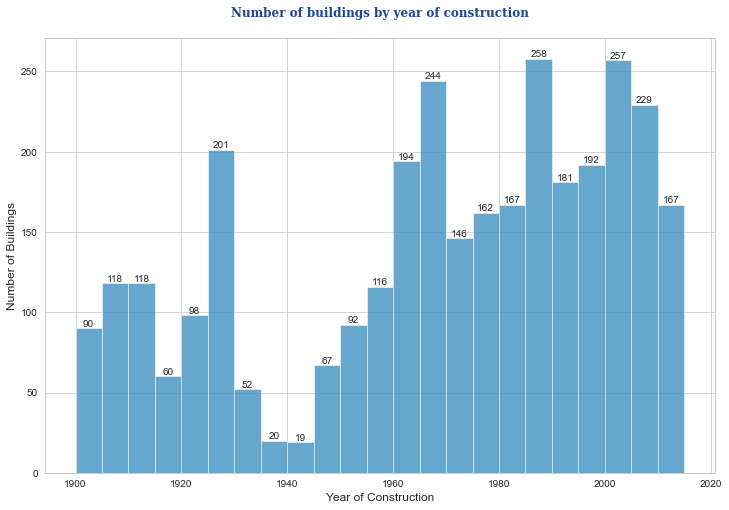

In [48]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_2015, x='YearBuilt', bins=int((data_2015.YearBuilt.max() - data_2015.YearBuilt.min())/5))
ax.set_xlabel("Year of Construction")
ax.set_ylabel("Number of Buildings")
ax.bar_label(ax.containers[0])
plt.title(f"Number of buildings by year of construction\n", fontdict=font_title)
plt.show()

In [49]:
data_2015['BuildingAge'] = data_2015['DataYear'] - data_2015['YearBuilt']
data_2015.drop('YearBuilt', axis=1, inplace=True)

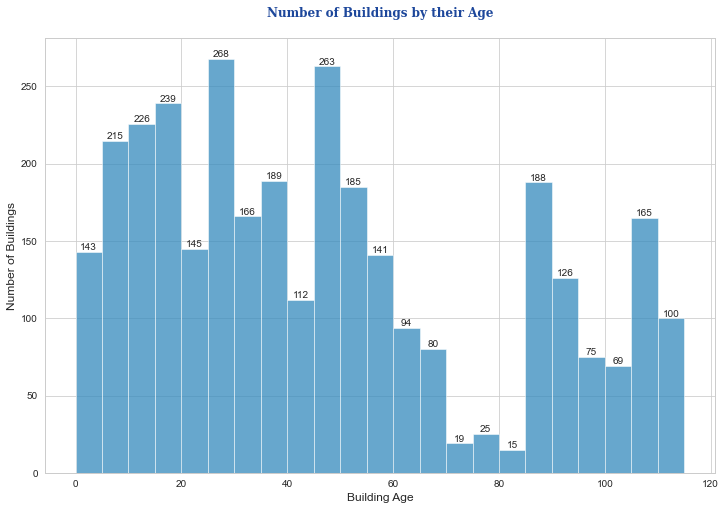

In [50]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_2015, x='BuildingAge', bins=int((data_2015.BuildingAge.max() - data_2015.BuildingAge.min())/5))
ax.set_xlabel("Building Age")
ax.set_ylabel("Number of Buildings")
plt.title(f"Number of Buildings by their Age\n", fontdict=font_title)
ax.bar_label(ax.containers[0])
plt.show()

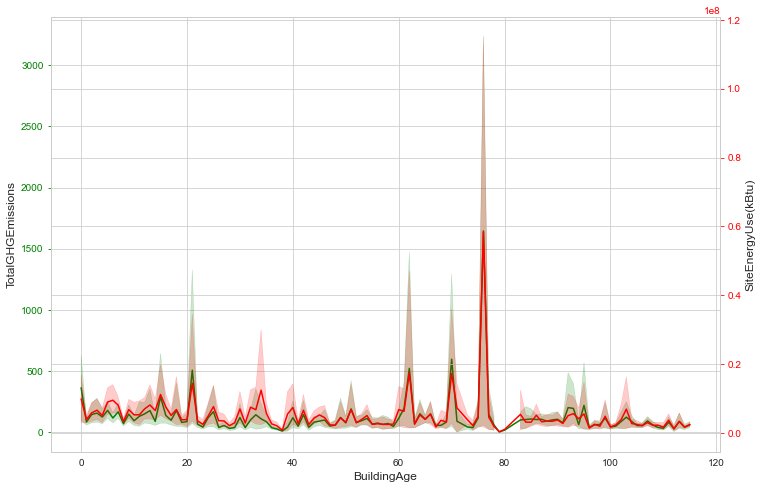

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
sns.lineplot(data=data_2015, x='BuildingAge', y='TotalGHGEmissions', color='g', ax=ax1)
sns.lineplot(data=data_2015, x='BuildingAge', y='SiteEnergyUse(kBtu)', color='r', ax=ax2)
ax1.tick_params(axis='y', colors='green')
ax2.tick_params(axis='y', colors='red')

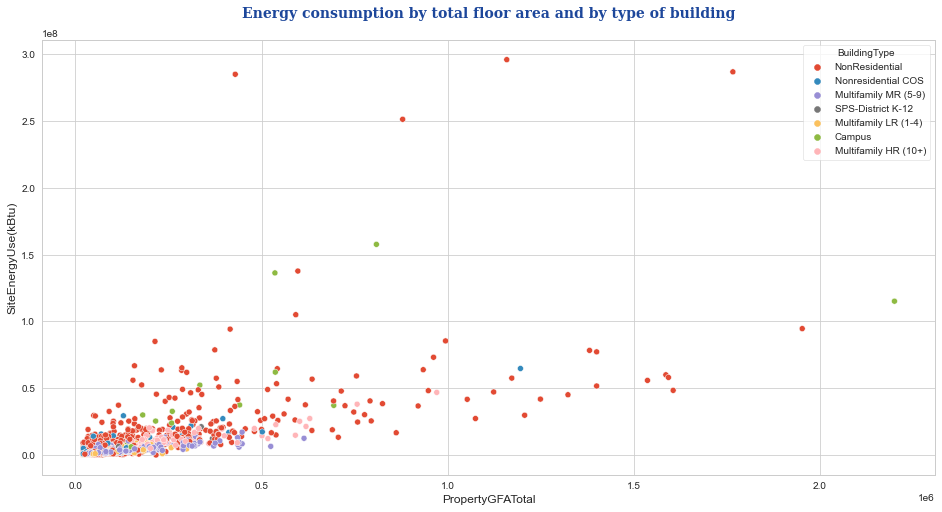

In [52]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 12,
             }

fig = plt.figure(figsize=(16,8))
sns.scatterplot(data = data_2015, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Energy consumption by total floor area and by type of building\n", 
          fontdict=font_title, size=14)
plt.show()

In [53]:
# We can see the top 5 buildings that have higher energy consumption are hospitals, a major telecommunications hub facility and campus.
import pandas as pd
pd.set_option('display.max_columns', None)

data_filter[data_filter['SiteEnergyUse(kBtu)']>1.5*10**8]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Zip Codes,Latitude,Longitude,State,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance,BuildingAge
123,2015,NonResidential,Hospital,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),NORTHEAST,1,10.0,879000,Hospital (General Medical & Surgical),NaN,13.0,251191824.0,0.0,114748139.0,136448438.0,8046.70,18383,47.66356652,-122.2813832,WA,1,1.00000,0.00000,879000.000,87900.000,4.610491,62
170,2015,NonResidential,Hospital,HARBORVIEW MEDICAL CENTER,EAST,1,8.0,1158691,Hospital (General Medical & Surgical),NaN,30.0,295812640.0,122701720.0,170891586.0,2226424.0,10780.64,18379,47.60387131,-122.3226998,WA,2,1.00000,0.00000,1158691.000,144836.375,0.466209,15
560,2015,NonResidential,Other,THE WESTIN BUILDING,DOWNTOWN,1,33.0,429405,Data Center,NaN,71.0,284867168.0,0.0,284726322.0,152639.0,1992.96,19576,47.61435318,-122.33885956,WA,2,1.00000,0.00000,429405.000,13012.273,0.644904,34
621,2015,NonResidential,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,EAST,1,14.0,1765970,Hospital (General Medical & Surgical),NaN,59.0,286685536.0,127869744.0,140448322.0,18373320.0,11824.89,19578,47.608951,-122.322402,WA,2,1.00000,0.00000,1765970.000,126140.714,0.489779,21
3272,2015,Campus,Other,AMGEN INC. MASTER CAMPUS,MAGNOLIA / QUEEN ANNE,7,4.0,808520,Other,NaN,NaN,157606480.0,0.0,76742000.0,80867644.0,4829.86,19575,47.62811223,-122.3742647,WA,1,0.53495,0.46505,115502.857,202130.000,2.477926,13


In [54]:
numerical_features = data_filter.select_dtypes(include=['int64','float64'])
categorical_features = data_filter.select_dtypes(exclude=['int64','float64']) 

In [55]:
categorical_features.nunique()

BuildingType                   7
PrimaryPropertyType           24
PropertyName                3197
Neighborhood                  13
LargestPropertyUseType        57
YearsENERGYSTARCertified      61
Latitude                    3160
Longitude                   3141
State                          1
dtype: int64

In [56]:
categorical_features = categorical_features.drop(['State','YearsENERGYSTARCertified'], axis=1)

In [57]:
list(numerical_features.columns)

['DataYear',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'Zip Codes',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'haversine_distance',
 'BuildingAge']

In [58]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore'], axis=1)

In [59]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)

In [60]:
#save the dataset
data_filter.to_csv("C:/Users/dlaminus/Desktop/Data Analysis/Kaggle_Building Energy/Seattle Buildings and Energy Analysis (Final_25Oct2022)v2.csv", index=False)

In [61]:
data_filter['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           962
Mid-Rise Multifamily           522
Small- and Mid-Sized Office    284
Other                          258
Non-Refrigerated Warehouse     187
Large Office                   161
K-12 School                    130
Mixed Use Property             126
High-Rise Multifamily          100
Retail Store                    96
Worship Facility                72
Hotel                           71
Distribution Center             53
Senior Care Community           43
Medical Office                  43
Supermarket/Grocery Store       36
Self-Storage Facility           28
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant                      11
Hospital                        10
SPS-District K-12                4
Laboratory                       1
Name: PrimaryPropertyType, dtype: int64

[Text(0, 0, '962'),
 Text(0, 0, '522'),
 Text(0, 0, '284'),
 Text(0, 0, '258'),
 Text(0, 0, '187'),
 Text(0, 0, '161'),
 Text(0, 0, '130'),
 Text(0, 0, '126'),
 Text(0, 0, '100'),
 Text(0, 0, '96'),
 Text(0, 0, '72'),
 Text(0, 0, '71'),
 Text(0, 0, '53'),
 Text(0, 0, '43'),
 Text(0, 0, '43'),
 Text(0, 0, '36'),
 Text(0, 0, '28'),
 Text(0, 0, '22'),
 Text(0, 0, '15'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '4'),
 Text(0, 0, '1')]

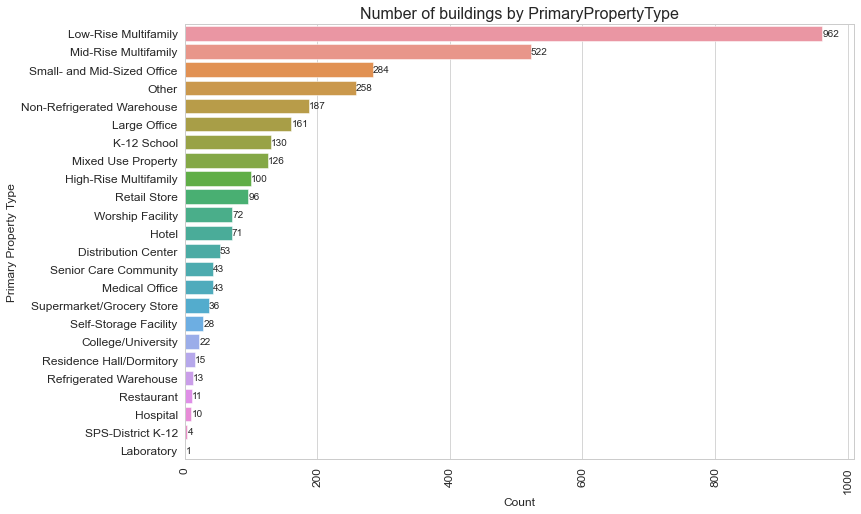

In [62]:
#using sns.countplot to plot 'Primary Building Type' 
plt.figure(figsize=(12,8))
ax = sns.countplot(y="PrimaryPropertyType", data=data_filter, order=data_filter['PrimaryPropertyType'].value_counts().index)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel("Primary Property Type", size=12)
plt.xlabel("Count", size=12)
plt.title("Number of buildings by PrimaryPropertyType", fontsize=16)

ax.bar_label(ax.containers[0])

In [63]:
data_filter['Energy_per_GFA']=data_filter['SiteEnergyUse(kBtu)']/data_filter['PropertyGFATotal']

Pivot Tables

In [64]:
import pandas as pd
pd.set_option('display.max_rows', None)


df1=pd.pivot_table(
    data=data_filter, 
    index=['PrimaryPropertyType'], 
    values=['Energy_per_GFA','TotalGHGEmissions'],    
    aggfunc={'TotalGHGEmissions':[np.sum],'Energy_per_GFA':['count', np.mean]},
    fill_value=0
)
df1=df1.sort_values(by=('Energy_per_GFA','mean'),ascending=False)
df1

Energy_per_GFA             TotalGHGEmissions
                                     count        mean               sum
PrimaryPropertyType                                                     
Laboratory                               1  247.374774            612.84
Supermarket/Grocery Store               36  235.737882           8191.87
Hospital                                10  192.789527          46847.63
Restaurant                              11  173.093623           2045.79
Other                                  258   96.191478          62891.93
Refrigerated Warehouse                  13   85.747008            417.72
Senior Care Community                   43   76.810149          11574.93
Medical Office                          43   76.471661          11463.42
Hotel                                   71   74.683687          28609.63
Mixed Use Property                     126   71.100746          17738.28
College/University                      22   62.492728           9792.48
Retail Store                            96   61.679761           8138.87
Residence Hall/Dormitory                15   56.249209           1053.47
Small- and Mid-Sized Office            284   53.386318          11170.61
Large Office                           161   49.817900          32170.40
High-Rise Multifamily                  100   44.258458          21618.73
K-12 School                            130   43.283830          11778.43
SPS-District K-12                        4   35.458078            403.07
Distribution Center                     53   33.902057           2649.22
Worship Facility                        72   33.182882           2970.88
Non-Refrigerated Warehouse             187   32.902669           7447.79
Mid-Rise Multifamily                   522   32.396518          29753.75
Low-Rise Multifamily                   962   31.030194          22963.69
Self-Storage Facility                   28   18.802829            627.71

In [65]:
df2=pd.pivot_table(
    data=data_filter, 
    index=['PrimaryPropertyType'], 
    values=['Energy_per_GFA','TotalGHGEmissions'],    
    aggfunc={'TotalGHGEmissions':[np.sum],'Energy_per_GFA':['count', np.mean]},
    fill_value=0
)
df2=df2.sort_values(by=('TotalGHGEmissions','sum'),ascending=False)
df2

Energy_per_GFA             TotalGHGEmissions
                                     count        mean               sum
PrimaryPropertyType                                                     
Other                                  258   96.191478          62891.93
Hospital                                10  192.789527          46847.63
Large Office                           161   49.817900          32170.40
Mid-Rise Multifamily                   522   32.396518          29753.75
Hotel                                   71   74.683687          28609.63
Low-Rise Multifamily                   962   31.030194          22963.69
High-Rise Multifamily                  100   44.258458          21618.73
Mixed Use Property                     126   71.100746          17738.28
K-12 School                            130   43.283830          11778.43
Senior Care Community                   43   76.810149          11574.93
Medical Office                          43   76.471661          11463.42
Small- and Mid-Sized Office            284   53.386318          11170.61
College/University                      22   62.492728           9792.48
Supermarket/Grocery Store               36  235.737882           8191.87
Retail Store                            96   61.679761           8138.87
Non-Refrigerated Warehouse             187   32.902669           7447.79
Worship Facility                        72   33.182882           2970.88
Distribution Center                     53   33.902057           2649.22
Restaurant                              11  173.093623           2045.79
Residence Hall/Dormitory                15   56.249209           1053.47
Self-Storage Facility                   28   18.802829            627.71
Laboratory                               1  247.374774            612.84
Refrigerated Warehouse                  13   85.747008            417.72
SPS-District K-12                        4   35.458078            403.07

In [66]:
data_filter.head()

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,LargestPropertyUseType,Latitude,Longitude,DataYear,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Zip Codes,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance,BuildingAge,Energy_per_GFA
0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,Hotel,47.61219025,-122.33799744,2015,1,12.0,88434,6981428.0,2023032.0,3686160.0,1272388.0,249.43,18081,1,1.00000,0.00000,88434.0,7369.500,0.496412,88,78.945066
1,NonResidential,Hotel,PARAMOUNT HOTEL,DOWNTOWN,Hotel,47.61310583,-122.33335756,2015,1,11.0,103566,8354235.0,0.0,3905411.0,4448985.0,263.51,18081,3,0.85455,0.14545,103566.0,9415.091,0.480394,19,80.665807
2,NonResidential,Hotel,WESTIN HOTEL,DOWNTOWN,Hotel,47.61334897,-122.33769944,2015,1,41.0,961990,73130656.0,19660404.0,49762435.0,3709900.0,2061.48,18081,3,1.00000,0.00000,961990.0,23463.171,0.558193,46,76.020183
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,Hotel,47.6137544,-122.3409238,2015,1,18.0,119890,14829099.0,0.0,6066245.0,8763105.0,507.70,19576,3,0.89607,0.10393,119890.0,6660.556,0.663901,35,123.689207
5,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),DOWNTOWN,Police Station,47.6164389,-122.33676431,2015,1,2.0,97288,12051984.0,0.0,7271004.0,4781283.0,304.62,19576,1,0.61765,0.38235,97288.0,48644.000,0.739535,16,123.879451


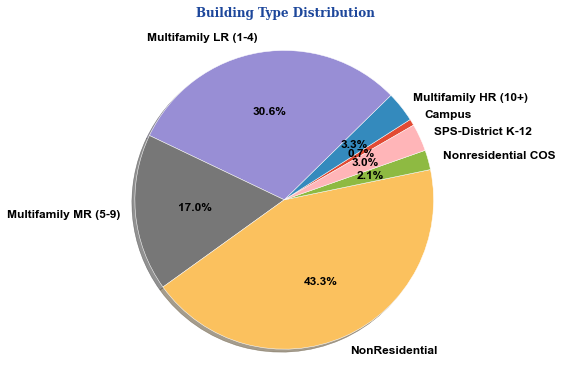

In [67]:
building_type = data_2015.groupby(by='BuildingType')['PropertyGFATotal'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 12,
             }

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title(f"Building Type Distribution\n", fontdict=font_title)

plt.show()

In [68]:
data_2015.loc[(data_2015['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    279
Other                          195
Non-Refrigerated Warehouse     181
Large Office                   157
Mixed Use Property              99
Retail Store                    96
Worship Facility                72
Hotel                           71
Distribution Center             51
Medical Office                  42
K-12 School                     39
Supermarket/Grocery Store       36
Self-Storage Facility           28
Senior Care Community           19
College/University              16
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Hospital                        10
Restaurant                      10
Laboratory                       1
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [69]:
#Visualization: using folium.Map to plot the location of Buildings in Seattle
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data_2015.Latitude, data_2015.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

import geopandas as gpd
df = gpd.read_file('https://github.com/seattleio/seattle-boundaries-data/blob/master/data/city-limits.geojson')
df
import sys
'geopandas' in sys.modules

In [70]:
# Create a pivot table to observe the relationship between 'Neighborhood' & 'PrimaryPropertyType' 

import pandas as pd
pd.set_option('display.max_columns', None)
df3_pivot = pd.pivot_table(data=data_filter, 
                          index='Neighborhood', 
                          columns='PrimaryPropertyType',
                          aggfunc='count',
                          values='NumberofBuildings',
                          fill_value=0
                         )
df3_pivot['Total'] = df3_pivot.sum(axis=1)
df3_pivot = df3_pivot.sort_values('Total' , ascending=False)
df3_pivot


PrimaryPropertyType,College/University,Distribution Center,High-Rise Multifamily,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mid-Rise Multifamily,Mixed Use Property,Non-Refrigerated Warehouse,Other,Refrigerated Warehouse,Residence Hall/Dormitory,Restaurant,Retail Store,SPS-District K-12,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket/Grocery Store,Worship Facility,Total
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,
DOWNTOWN,4,0,56,0,38,2,0,102,36,4,93,34,6,47,0,2,7,20,0,3,4,88,0,2,548
EAST,7,0,30,3,5,14,0,0,164,15,116,15,4,22,0,2,0,5,0,1,4,17,3,6,433
MAGNOLIA / QUEEN ANNE,3,3,3,0,6,10,0,15,161,1,90,12,9,33,0,2,0,3,0,5,3,38,4,7,408
GREATER DUWAMISH,1,42,1,0,2,10,0,9,22,0,2,13,129,52,13,0,0,16,0,5,1,40,4,2,364
NORTHEAST,1,0,3,2,6,13,0,3,92,8,42,8,2,17,0,8,0,13,0,5,1,6,5,17,252
LAKE UNION,1,2,2,1,9,5,1,30,56,1,41,19,9,11,0,1,2,6,1,0,1,42,1,1,243
NORTHWEST,1,0,3,1,4,14,0,0,111,3,17,3,6,17,0,0,0,9,1,1,6,11,4,10,222
NORTH,0,0,0,0,0,8,0,1,95,4,19,4,2,17,0,0,0,8,0,2,10,10,3,3,186
SOUTHWEST,0,0,0,1,0,9,0,0,74,1,40,6,2,7,0,0,1,0,0,1,2,1,5,8,158


<AxesSubplot:title={'center':'Number of buildings by Neighborhood by Type'}, xlabel='Neighborhood'>

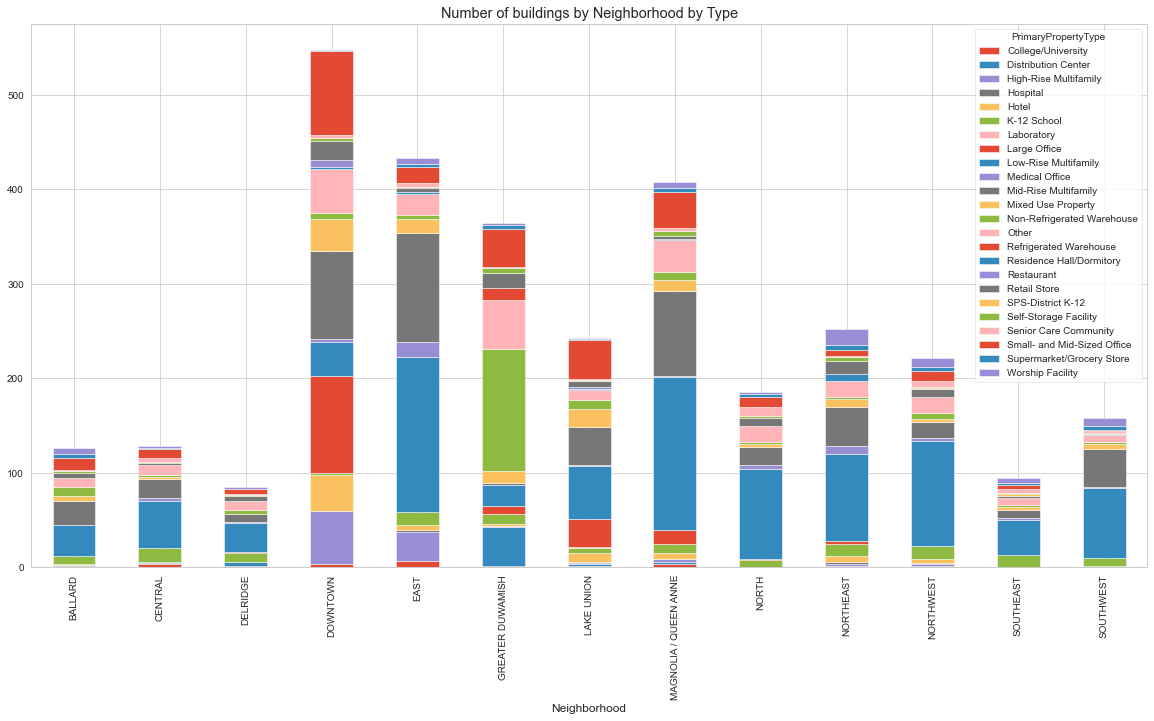

In [71]:
# Plot a Bar_chart to refer the Pivot Table 

import pandas as pd
pd.set_option('display.max_columns', None)
pivot = pd.pivot_table(data=data_filter, 
                       index='Neighborhood', 
                       columns='PrimaryPropertyType',
                       aggfunc='count',
                       values='NumberofBuildings',
                       fill_value=0
                       )
pivot.plot(kind='bar', stacked=True, figsize=(20,10), title='Number of buildings by Neighborhood by Type')

In [72]:
data_filter['Energy_per_GFA']=data_filter['SiteEnergyUse(kBtu)']/data_filter['PropertyGFATotal']

In [108]:
# Create a pivot table to find out the building that consumes energy the most and contribute GHG emmission the most - "The Westin Building"

import pandas as pd
pd.set_option('display.max_rows', None)


df4=pd.pivot_table(
    data=data_filter, 
    index=['PrimaryPropertyType','PropertyName','Energy_per_GFA'], 
    values=['PropertyGFATotal','SiteEnergyUse(kBtu)','TotalGHGEmissions'],    
    aggfunc=[np.sum],
    fill_value=0
)
df4=df4.sort_values(by='Energy_per_GFA', ascending=False)
#Display the first 5 rows
df4.head()

sum  \
                                                                                      PropertyGFATotal   
PrimaryPropertyType PropertyName                                       Energy_per_GFA                    
Other               THE WESTIN BUILDING                                663.399746               429405   
                    3000/3018 Western                                  599.810189                49249   
                    SPACE NEEDLE                                       561.119190                33971   
                    NORTHWEST HOSPITAL & MEDICAL CENTER (NEW PROFES... 544.945740                53575   
Restaurant          SALTYS RESTAURANT                                  445.392097                20398   

                                                                                                           \
                                                                                      SiteEnergyUse(kBtu)   
PrimaryPropertyType PropertyName                                       Energy_per_GFA                       
Other               THE WESTIN BUILDING                                663.399746               284867168   
                    3000/3018 Western                                  599.810189                29540052   
                    SPACE NEEDLE                                       561.119190                19061780   
                    NORTHWEST HOSPITAL & MEDICAL CENTER (NEW PROFES... 544.945740                29195468   
Restaurant          SALTYS RESTAURANT                                  445.392097                 9085108   

                                                                                                         
                                                                                      TotalGHGEmissions  
PrimaryPropertyType PropertyName                                       Energy_per_GFA                    
Other               THE WESTIN BUILDING                                663.399746               1992.96  
                    3000/3018 Western                                  599.810189               1084.49  
                    SPACE NEEDLE                                       561.119190                570.98  
                    NORTHWEST HOSPITAL & MEDICAL CENTER (NEW PROFES... 544.945740                595.67  
Restaurant          SALTYS RESTAURANT                                  445.392097                326.65

In [74]:
# Find out the specific building(s) that consumes energy the most and contributed GHG emission the most as well, with:  
#a) Property Name 
#b) Primary Property Type
#c) Neighborhood 

import pandas as pd
pd.set_option('display.max_columns', None)


df5=pd.pivot_table(
    data=data_filter, 
    index=['Neighborhood','PrimaryPropertyType','PropertyName','Energy_per_GFA'], 
    values=['PropertyGFATotal','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions'],    
    aggfunc=[np.sum],
    fill_value=0
)
df5=df5.sort_values(by=['Neighborhood','Energy_per_GFA'],ascending=False)
#Display the first 5 rows
df5.head()

sum  \
                                                                                       Electricity(kBtu)   
Neighborhood PrimaryPropertyType       PropertyName                     Energy_per_GFA                     
SOUTHWEST    Restaurant                SALTYS RESTAURANT                445.392097               3378201   
             Supermarket/Grocery Store ADMIRAL METROPOLITAN MARKET      383.308376               6088718   
                                       WEST SEATTLE THRIFTWAY           259.836913               5549794   
             Other                     NW ART AND FRAME/HUSKY ICE CREAM 228.302660               2657078   
             Supermarket/Grocery Store QFC                              218.858414               5646757   

                                                                                                         \
                                                                                       NaturalGas(kBtu)   
Neighborhood PrimaryPropertyType       PropertyName                     Energy_per_GFA                    
SOUTHWEST    Restaurant                SALTYS RESTAURANT                445.392097              5707048   
             Supermarket/Grocery Store ADMIRAL METROPOLITAN MARKET      383.308376              6116456   
                                       WEST SEATTLE THRIFTWAY           259.836913              3208500   
             Other                     NW ART AND FRAME/HUSKY ICE CREAM 228.302660              2406785   
             Supermarket/Grocery Store QFC                              218.858414              2640334   

                                                                                                         \
                                                                                       PropertyGFATotal   
Neighborhood PrimaryPropertyType       PropertyName                     Energy_per_GFA                    
SOUTHWEST    Restaurant                SALTYS RESTAURANT                445.392097                20398   
             Supermarket/Grocery Store ADMIRAL METROPOLITAN MARKET      383.308376                31841   
                                       WEST SEATTLE THRIFTWAY           259.836913                33706   
             Other                     NW ART AND FRAME/HUSKY ICE CREAM 228.302660                22180   
             Supermarket/Grocery Store QFC                              218.858414                37864   

                                                                                                            \
                                                                                       SiteEnergyUse(kBtu)   
Neighborhood PrimaryPropertyType       PropertyName                     Energy_per_GFA                       
SOUTHWEST    Restaurant                SALTYS RESTAURANT                445.392097                 9085108   
             Supermarket/Grocery Store ADMIRAL METROPOLITAN MARKET      383.308376                12204922   
                                       WEST SEATTLE THRIFTWAY           259.836913                 8758063   
             Other                     NW ART AND FRAME/HUSKY ICE CREAM 228.302660                 5063753   
             Supermarket/Grocery Store QFC                              218.858414                 8286855   

                                                                                                       \
                                                                                       SteamUse(kBtu)   
Neighborhood PrimaryPropertyType       PropertyName                     Energy_per_GFA                  
SOUTHWEST    Restaurant                SALTYS RESTAURANT                445.392097                  0   
             Supermarket/Grocery Store ADMIRAL METROPOLITAN MARKET      383.308376                  0   
                                       WEST SEATTLE THRIFTWAY           259.836913                  0   
           

In [75]:
# Create a pivot table to find out the building that consumpted energy the most and contribute GHG emmission the most - "The Westin Building"
# Distance is the distance (mean) between the center of Seattle to the building(s) 

import pandas as pd
pd.set_option('display.max_columns', None)


df6=pd.pivot_table(
    data=data_filter, 
    index=['Neighborhood'], 
    values=['PropertyGFATotal','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions'],    
    aggfunc={'PropertyGFATotal':[np.sum],'SiteEnergyUse(kBtu)':['count', np.sum, np.mean, np.std],'TotalGHGEmissions':[np.sum]},
    fill_value=0
)
df6=df6.sort_values(by=('SiteEnergyUse(kBtu)','sum'),ascending=False)
df6

PropertyGFATotal SiteEnergyUse(kBtu)                \
                                   sum               count          mean   
Neighborhood                                                               
DOWNTOWN                      96586290                 548  9.618702e+06   
EAST                          35894548                 433  5.590880e+06   
LAKE UNION                    26413616                 243  6.691377e+06   
MAGNOLIA / QUEEN ANNE         27278671                 408  3.242276e+06   
GREATER DUWAMISH              27215078                 364  3.617007e+06   
NORTHEAST                     16590028                 252  3.878890e+06   
NORTHWEST                     14579321                 222  3.441376e+06   
NORTH                         13715761                 186  2.778517e+06   
CENTRAL                        8427178                 128  3.742174e+06   
BALLARD                        8716058                 126  3.397067e+06   
SOUTHWEST                      7841011                 158  2.188764e+06   
SOUTHEAST                      6682588                  95  3.348249e+06   
DELRIDGE                       6467837                  85  3.226518e+06   

                                                TotalGHGEmissions  
                                std         sum               sum  
Neighborhood                                                       
DOWNTOWN               1.785421e+07  5271048848          98851.15  
EAST                   2.213001e+07  2420850997          75946.83  
LAKE UNION             1.361614e+07  1626004537          30696.10  
MAGNOLIA / QUEEN ANNE  9.249954e+06  1322848581          29954.14  
GREATER DUWAMISH       8.212074e+06  1316590677          23340.07  
NORTHEAST              1.631367e+07   977480236          23981.97  
NORTHWEST              7.590375e+06   763985373          17735.05  
NORTH                  3.408668e+06   516804179           9483.70  
CENTRAL                1.236513e+07   478998216          11903.69  
BALLARD                6.460336e+06   428030424           9821.59  
SOUTHWEST              4.240994e+06   345824747           8182.37  
SOUTHEAST              4.016567e+06   318083652           7454.78  
DELRIDGE               4.647933e+06   274254017           5581.70

Model Development 

Import Modules

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


Model Helper Functions

In [77]:
def lin_reg_sklearn(X_train, X_test, y_train, y_test, drop_list=[]):
    """
    Perform a Linear Regression with SK Learn and output 
    RMSE from the test and training sets, plus a cross validation of the training set.
    """
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    y_hat_train = lin_reg.predict(X_train)
    y_hat_test = lin_reg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)

    print(f'Training Set RMSE: {np.sqrt(train_mse)}')
    print(f'Test Set RMSE: {np.sqrt(test_mse)}')
    print(f'')
    print(f'Training Set MAE: {train_mae}')
    print(f'Test Set MAE: {test_mae}')
    print('')

    MSE = make_scorer(mean_squared_error)
    
    cv_rmse = np.sqrt(np.mean(cross_val_score(lin_reg, X_train, 
                                                    y_train, cv=10,
                                                   scoring=MSE)))
    print(f'Cross Val RMSE: {cv_rmse}')

In [78]:
#OLS Regression
def lin_reg_statsmodels(X_train, y_train, drop_list=[]):
    """
    Perform a Linear Regression with Statsmodels, output the summary and
    return the model
    """
    
    X_train_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_int).fit()
    display(model.summary())
    
    return model

In [79]:
def drop_features(X_train, X_test, drop_list):
    """
    Drop features in the drop_list from the two dataframes and return
    the two updated dataframes
    """
    if len(drop_list) >= 1:
        X_train = X_train.drop(drop_list, axis=1)
        X_test = X_test.drop(drop_list, axis=1)
    
    return X_train, X_test

In [80]:
def regression_plots(data, model):
    """Regression plots for the features in the data dataframe based on the model"""
    for col in data.columns:
        fig = plt.figure(figsize=(16,12))
        sm.graphics.plot_regress_exog(model, col, fig=fig)
        fig.show()

In [81]:
def vif_analysis(data):
    """VIF analysis on the data dataframe"""
    for i in range(len(data.columns)):
        v=vif(np.matrix(data),i)
        print("Variance inflation factor for {}: {}".format(data.columns[i],round(v,2)))

In [82]:
def drop_outliers(data, col, n_std):
    """
    Return a dataframe without outliers
    
    Parameters:
    data: dataframe
    col: column to check for outliers
    n_std: number of standard deviations to consider when dropping outliers
    """
    return data[np.abs(data[col]-data[col].mean())<=(n_std*data[col].std())]

In [83]:
def outlier_val(data, col, n_std):
    """
    Return data value in specified collumn at specified number of 
    standard deviations from the mean
    
    Parameters:
    data: dataframe
    col: column to check for outliers
    n_std: number of standard deviations to consider when dropping outliers
    """
    return n_std*data[col].std()

In [84]:
# train_test_split, on numeric feature columns

X = data_filter[['NumberofBuildings','NumberofFloors','PropertyGFATotal','SiteEnergyUse(kBtu)','haversine_distance','BuildingAge','TotalUseTypeNumber']]
y = data_filter[['TotalGHGEmissions']]


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
cont_data_cols = ['NumberofBuildings','NumberofFloors','PropertyGFATotal','SiteEnergyUse(kBtu)','haversine_distance','BuildingAge','TotalUseTypeNumber']

In [87]:
X_train_cont_features = X_train[cont_data_cols]
X_test_cont_features = X_test[cont_data_cols]

In [88]:
lin_reg_sklearn(X_train_cont_features, X_test_cont_features, y_train, y_test)

Training Set RMSE: 169.6089360577692
Test Set RMSE: 209.53844757350916

Training Set MAE: 51.07550277533238
Test Set MAE: 58.64072579167292

Cross Val RMSE: 211.29002259123774


In [89]:
model_cont_features = lin_reg_statsmodels(X_train_cont_features, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1523.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:00:35   Log-Likelihood:                -17023.
No. Observations:                2598   AIC:                         3.406e+04
Df Residuals:                    2590   BIC:                         3.411e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  47.8731     12.762      3.751      0.000      22.849      72.897
NumberofBuildings      -0.2182      4.176     -0.052      0.958      -8.407       7.970
NumberofFloors         -9.0758      0.877    -10.349      0.000     -10.795      -7.356
PropertyGFATotal    -9.091e-05   3.96e-05     -2.294      0.022      -0.000   -1.32e-05
SiteEnergyUse(kBtu)  2.647e-05   3.23e-07     82.057      0.000    2.58e-05    2.71e-05
haversine_distance     -3.1106      1.602     -1.942      0.052      -6.252       0.031
BuildingAge             0.0790      0.110      0.719      0.472      -0.136       0.294
TotalUseTypeNumber     -8.4935      3.233     -2.627      0.009     -14.834      -2.153
==============================================================================
Omnibus:                     3999.088   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18187490.848
Skew:                          -8.540   Prob(JB):                         0.00
Kurtosis:                     412.539   Cond. No.                     5.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Terms description:
[1] R-squared 
    the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
[2] Adj. R-squared
    Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
[3] F-statistic
    the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
[4] coef
    the coefficients of the independent variables and the constant term in the equation.
[5] t
    the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

Conclusions:
1) (t>1.96 or t<-1.96) and P-value <0.05 
    Independent variable is accepted.
2) R-squared
    % variation in dependent variable is explained due to independent variables

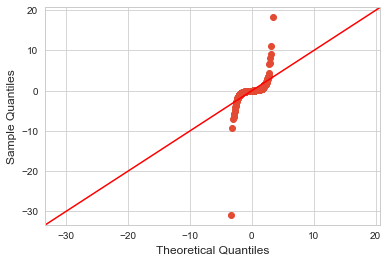

In [90]:
sm.graphics.qqplot(model_cont_features.resid, line='45', fit=True);

<AxesSubplot:>

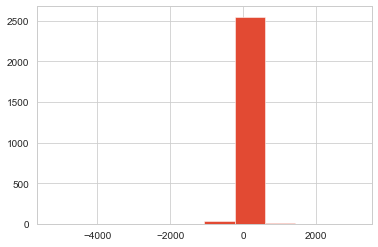

In [91]:
model_cont_features.resid.hist()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


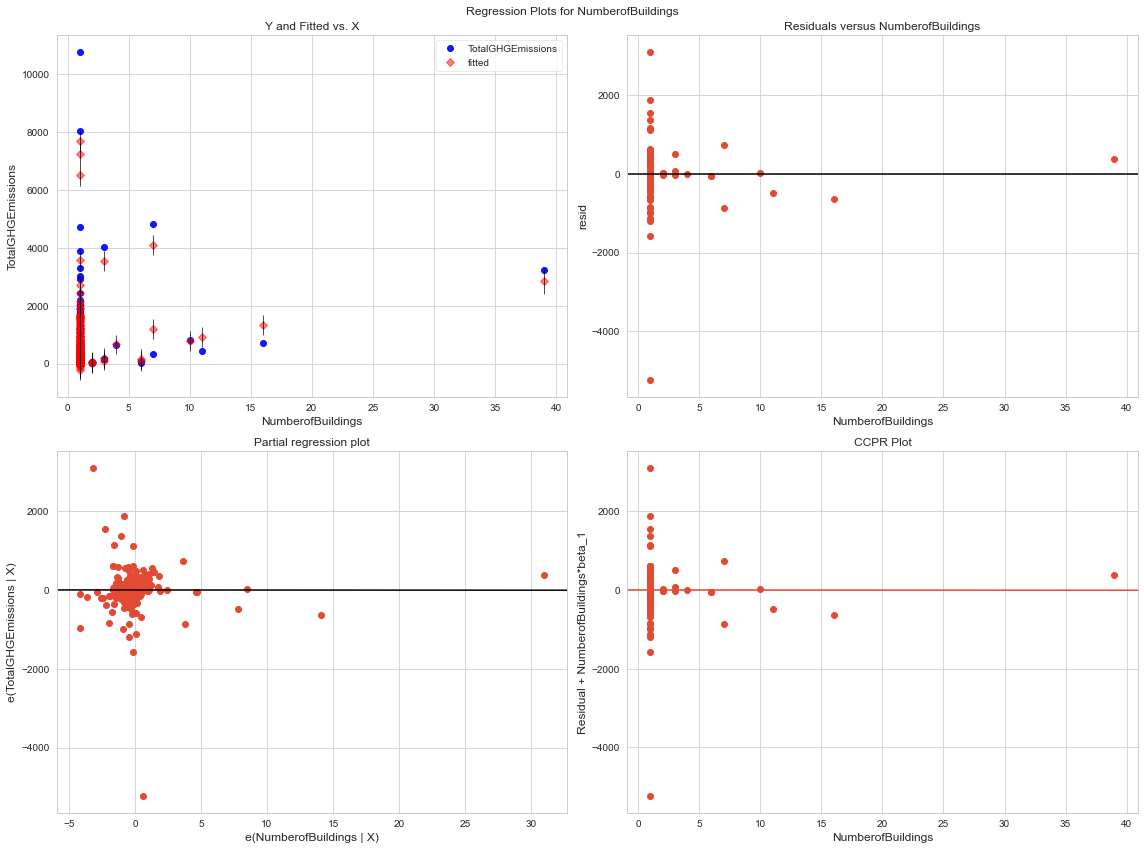

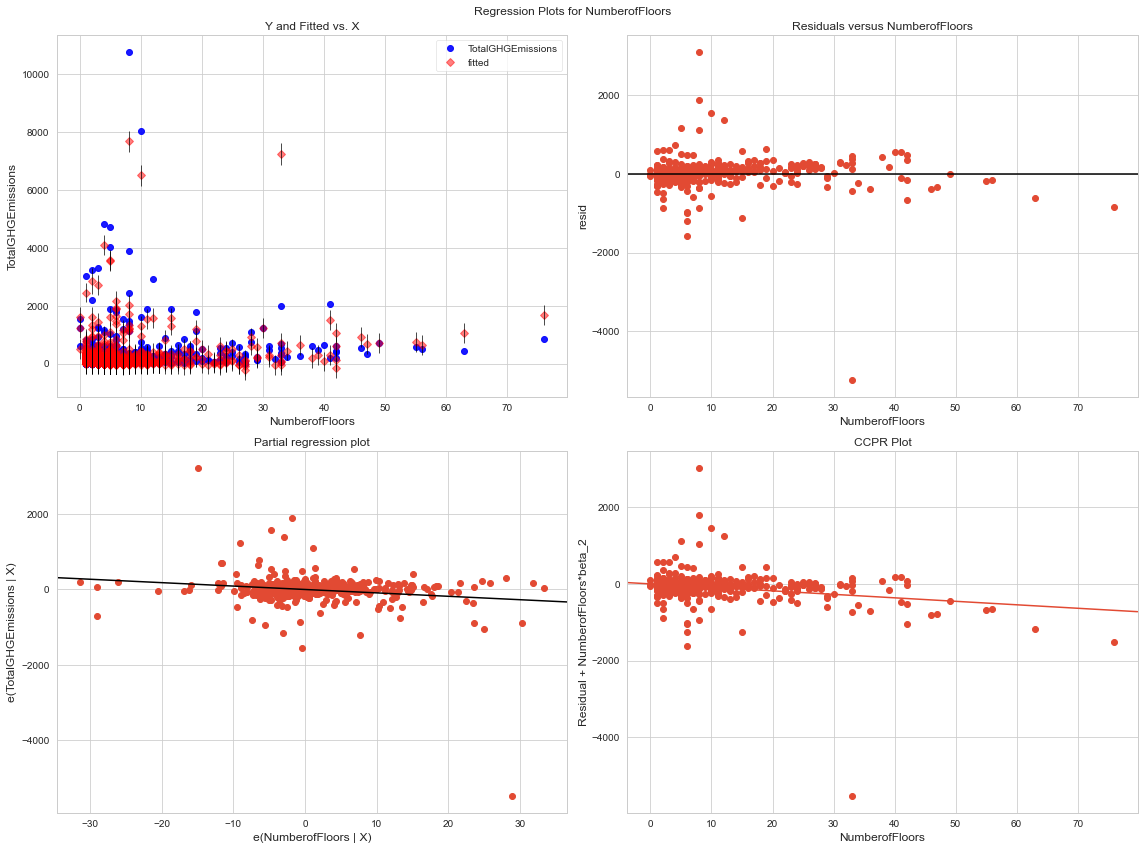

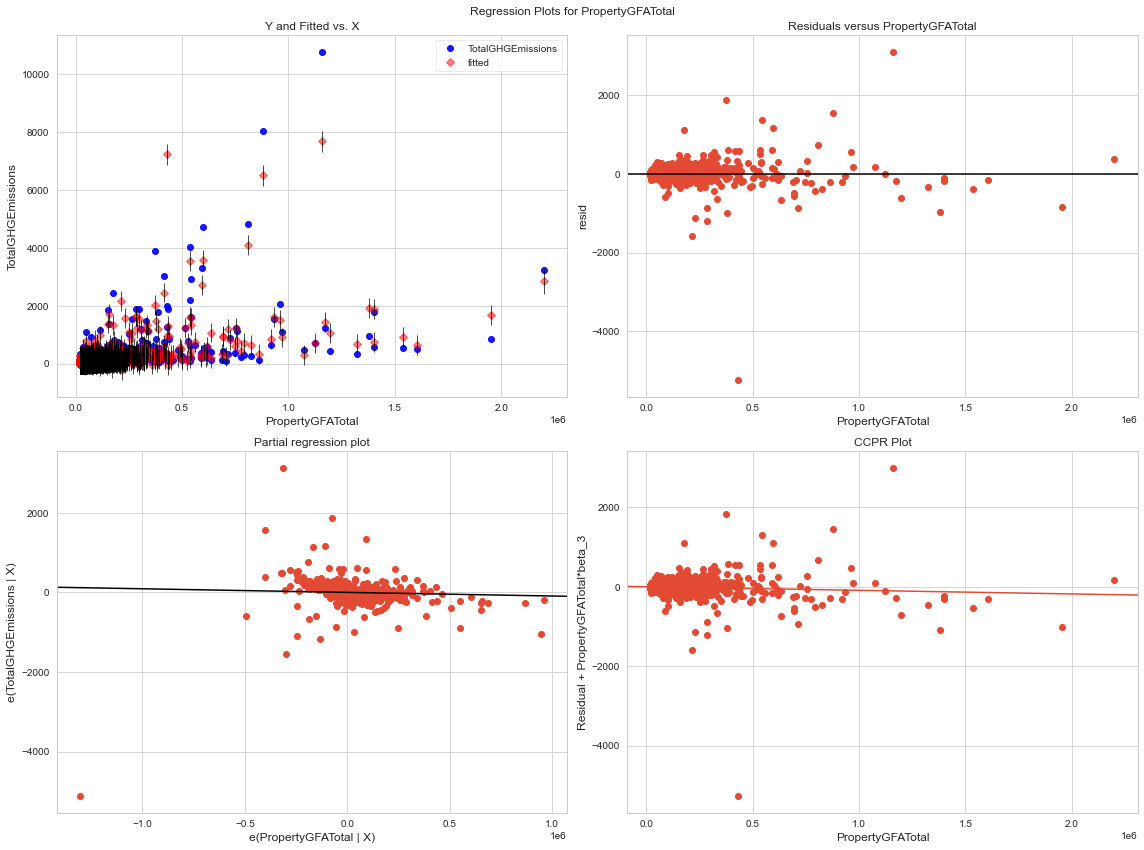

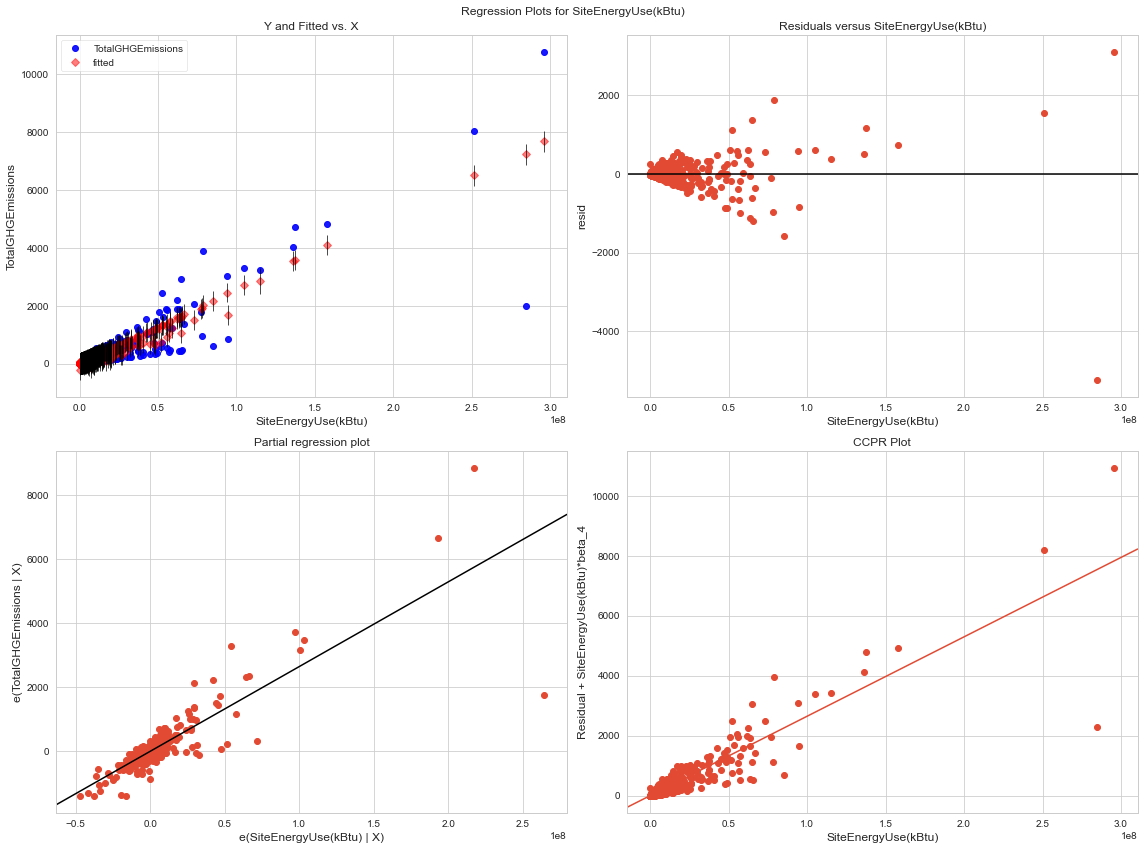

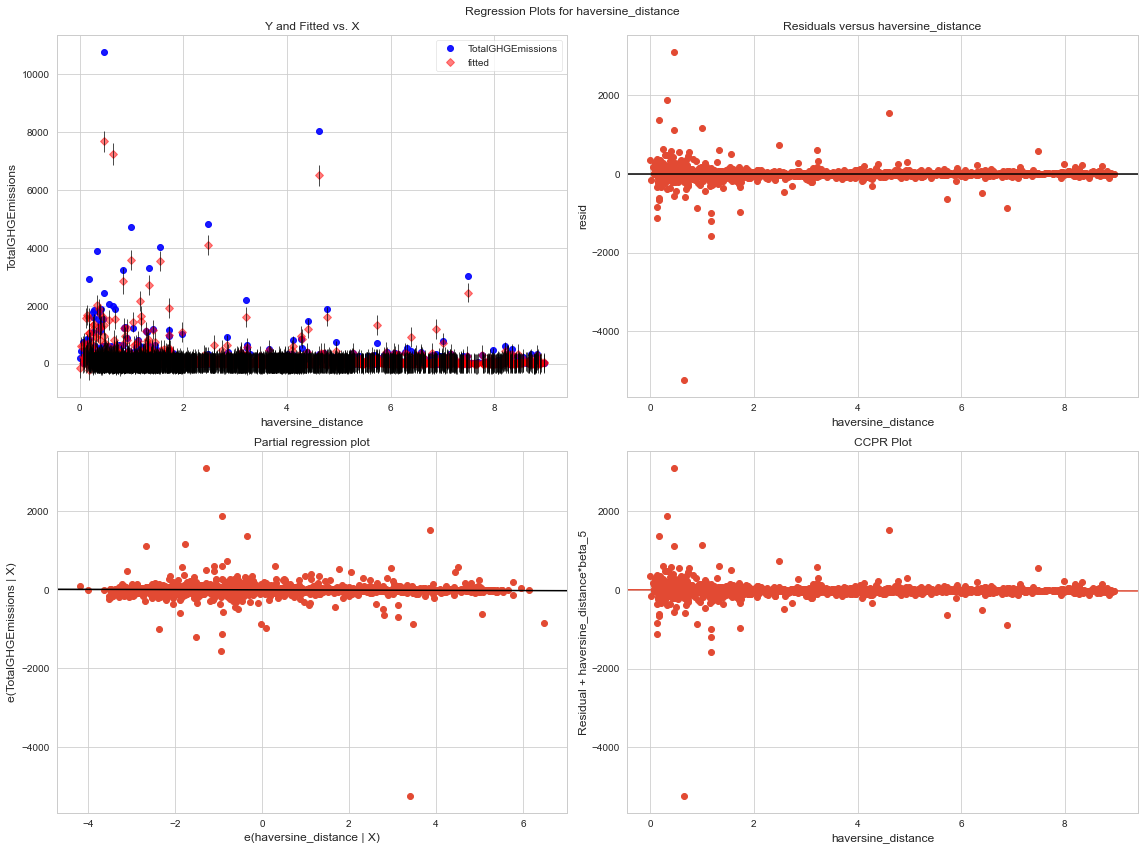

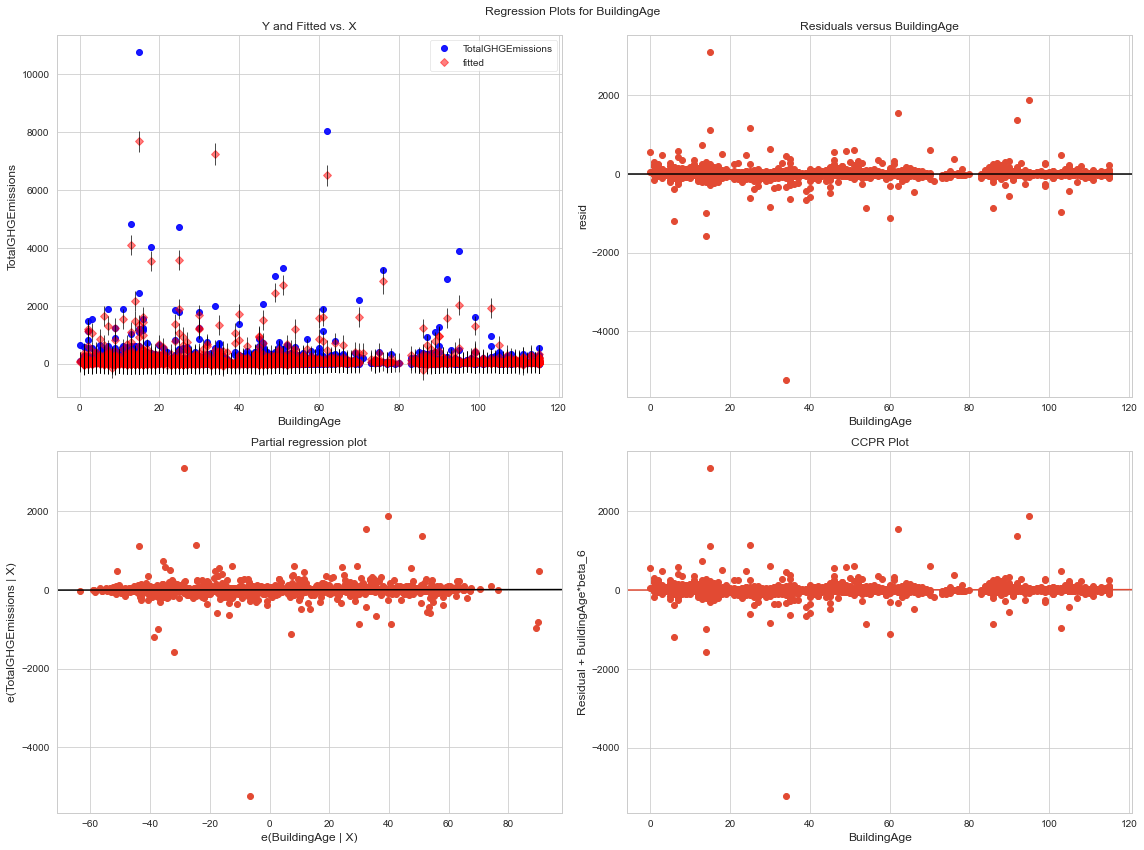

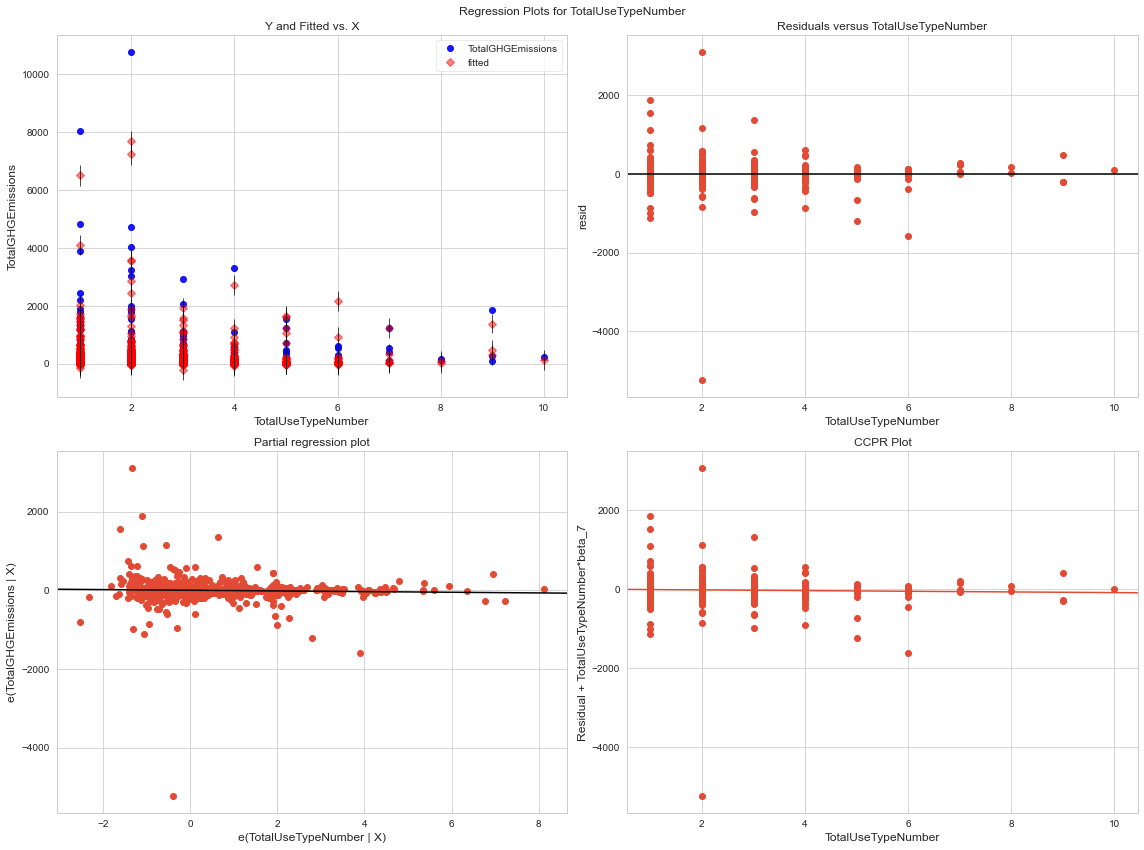

In [92]:
#Plots for Regression and Residuals
for col in X_train_cont_features.columns:
    fig = plt.figure(figsize=(16,12))
    sm.graphics.plot_regress_exog(model_cont_features, col, fig=fig)
    fig.tight_layout()

In [93]:
#Verification of multicollinearity with the VIF (Variance Inflation Factor):VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem.  

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X_train_cont_features.columns)):
    v=vif(np.matrix(X_train_cont_features),i)
    print("Variance inflation factor for {}: {}".format(X_train_cont_features.columns[i],round(v,2)))

Variance inflation factor for NumberofBuildings: 2.57
Variance inflation factor for NumberofFloors: 2.86
Variance inflation factor for PropertyGFATotal: 4.05
Variance inflation factor for SiteEnergyUse(kBtu): 2.02
Variance inflation factor for haversine_distance: 1.95
Variance inflation factor for BuildingAge: 2.21
Variance inflation factor for TotalUseTypeNumber: 2.93


In [94]:
X_train_cont_features.corr()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),haversine_distance,BuildingAge,TotalUseTypeNumber
NumberofBuildings,1.000000,-0.021250,0.304719,0.220195,0.002467,0.001390,0.004999
NumberofFloors,-0.021250,1.000000,0.626292,0.353350,-0.289970,-0.147264,0.172223
PropertyGFATotal,0.304719,0.626292,1.000000,0.659682,-0.162515,-0.166209,0.203721
SiteEnergyUse(kBtu),0.220195,0.353350,0.659682,1.000000,-0.123735,-0.076039,0.131037
haversine_distance,0.002467,-0.289970,-0.162515,-0.123735,1.000000,-0.268698,-0.127791
BuildingAge,0.001390,-0.147264,-0.166209,-0.076039,-0.268698,1.000000,-0.089680
TotalUseTypeNumber,0.004999,0.172223,0.203721,0.131037,-0.127791,-0.089680,1.000000


Conclusion:

[1] Considering t-statistic (t>1.96 or t<-1.96) and P-value <0.05, independent variable is acceptable. 

[2] According to the OLS Regression table, the independent variables (NumberofFloors, PropertyGFATotal, SiteEnergyUse(kBtu), and TotalUseTypeNumber) are acceptable.

[3] We are supposed to select the 4 independent variables above-mentioned but a close relationship between NumberofFloors and PropertyGFATotal there is, we eventually select PropertyGFATotal, SiteEnergyUse(kBtu), TotalUseTypeNumber for the polynomial regression.

Polynomial Linear (Multivariate) Regression

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
df=data_filter
X, y = df[['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalUseTypeNumber']], df['TotalGHGEmissions']

Text(0.5, 0, 'no. of degree')

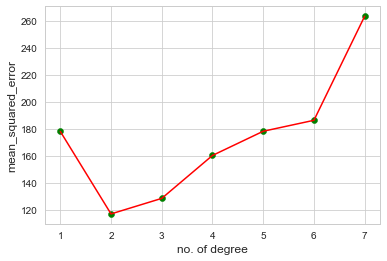

In [97]:
# Check accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(X)
   poly_model.fit(poly_x_values, y)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
plt.ylabel("mean_squared_error", size=12)
plt.xlabel("no. of degree", size=12)

In [98]:
#Polynomial degree = 2
df=data_filter
X, y = df[['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalUseTypeNumber']], df['TotalGHGEmissions']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [99]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [100]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

116.51215038292571

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

245.09549330622679

In [102]:
#The polynomial regression model performs twice better than the linear regression model.

In [103]:
print("Linear Regression Model coefficient:", lin_reg_model.coef_, "intercept", lin_reg_model.intercept_)

Linear Regression Model coefficient: [-1.70766573e-04  2.31709123e-05 -9.07080011e+00] intercept 21.545878255421712


In [104]:
print("Polynomial Regression Model coefficient:", poly_reg_model.coef_)

Polynomial Regression Model coefficient: [-2.87556122e-04  2.81125054e-05  1.69706264e-01 -1.66218359e-09
  3.82108280e-11  1.00706026e-04 -9.79253337e-14 -2.70958952e-06
  1.17095568e+00]


In [105]:
df.sample(5)

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,LargestPropertyUseType,Latitude,Longitude,DataYear,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Zip Codes,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance,BuildingAge,Energy_per_GFA
3281,NonResidential,Other,MERCEDES BENZ OF SEATTLE SHOWROOM & GARAGE,GREATER DUWAMISH,Automobile Dealership,47.58435424,-122.323194,2015,1,2.0,56988,650313.0,0.0,289614.0,360711.0,21.18,19584,2,1.00000,0.00000,56988.0,28494.000,1.564309,1,11.411402
1674,Multifamily MR (5-9),Mid-Rise Multifamily,CEDARVALE HOUSE & VILLAGE,NORTH,Multifamily Housing,47.71029503,-122.3199919,2015,1,7.0,88340,3408266.0,0.0,2611654.0,796721.0,60.52,19579,1,1.00000,0.00000,88340.0,12620.000,7.209289,45,38.581232
2403,Multifamily LR (1-4),Low-Rise Multifamily,WESTWOOD HEIGHTS EAST,DELRIDGE,Multifamily Housing,47.51765779,-122.3669322,2015,1,3.0,36260,1086093.0,0.0,1086139.0,0.0,7.57,19581,1,1.00000,0.00000,36260.0,12086.667,6.325155,18,29.952923
869,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC SUNRISE,NORTHEAST,Multifamily Housing,47.66275142,-122.30353696,2015,1,4.0,65103,2674034.0,0.0,2674145.0,0.0,18.64,18383,1,0.80878,0.19122,65103.0,16275.750,4.124565,27,41.073898
980,Multifamily LR (1-4),Low-Rise Multifamily,CITY VIEWS APTS,SOUTHWEST,Multifamily Housing,47.56873414,-122.3717832,2015,1,4.0,121037,2355732.0,0.0,2355830.0,0.0,16.42,19581,2,0.67526,0.32474,121037.0,30259.250,3.179118,23,19.462908


Prediction of GHG emission from the building with these values:

In [106]:
GFA = input("Enter PropertyGFATotal value: ")
EU = input("Enter SiteEnergyUse(kBtu) value: ")
TN = input("Enter TotalUseTypeNumber value: ")

Enter PropertyGFATotal value: 378525
Enter SiteEnergyUse(kBtu) value: 25476332
Enter TotalUseTypeNumber value: 3


In [107]:
poly_reg_model.predict(poly.fit_transform([[GFA,EU,TN]]))

C:\Users\dlaminus\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([591.80402319])

Conclusion:

The prediction is for reference, we cannot count on it because it is just based on the 3 independent variables to predict. There are many more we have to further dig out.